In [1]:
import pandas, numpy
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':40, 'font.family':'FreeSans', 'xtick.labelsize':40, 'ytick.labelsize':40, 'figure.figsize':(16,8)})

In [2]:
data_file = 'HUVEC_Allmeasurements.csv'

# 1. read data

In [3]:
df = pandas.read_csv(data_file, sep=',')
df

,Replicate,Experiment,Treatment,Timepoint (h),Raw (ohm),TEER (Ohm*cm2)
0,1,62,EGM,0.00,272,89.76
1,1,62,EGM,0.25,274,90.42
2,1,62,EGM,0.50,285,94.05
3,1,62,EGM,0.75,257,84.81
4,1,62,EGM,1.00,257,84.81
...,...,...,...,...,...,...
785,3,68,Iloprost,24.00,226,74.58
786,4,68,Iloprost,0.00,264,87.12
787,4,68,Iloprost,1.00,226,74.58
788,4,68,Iloprost,4.00,228,75.24


# 2. manipulate data

In [4]:
unique_replicates = list(set(df['Replicate'].values))
unique_timepoints = list(set(df['Timepoint (h)'].values))

unique_replicates.sort()
unique_timepoints.sort()

print(unique_replicates)
print(unique_timepoints, len(unique_timepoints))

[1, 2, 3, 4]
[0.0, 0.25, 0.5, 0.75, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 24.0] 13


## 2.1. select control

In [5]:
experiments_to_analyze = [62, 63, 65, 66, 68]

treatment_labels = ['EGM', '0.5 µM', '5 µM', 'TNFa', 'PECAM', 'Iloprost']
treatment_colors = ['black', 'blue', 'red', 'green', 'orange', 'purple']

EGM
(52, 6)
0.0 [89.76 90.09 95.04 92.07]
0.25 [90.42 91.41 86.13 89.76]
0.5 [94.05 91.74 85.47 92.4 ]
0.75 [84.81 86.13 82.83 86.79]
1.0 [84.81 85.14 81.84 89.1 ]
2.0 [81.18 79.2  78.54 89.1 ]
3.0 [78.54 77.22 74.91 80.52]
4.0 [78.54 77.22 76.56 85.47]
5.0 [81.18 82.17 80.52 85.14]
6.0 [75.24 78.54 73.26 78.87]
7.0 [77.55 80.85 77.22 82.5 ]
8.0 [79.2  78.87 75.9  84.15]
24.0 [78.54 76.56 74.58 80.19]
i 91.74000000000001
rt [[0.97841727 0.98201439 1.03597122 1.00359712]
 [0.98561151 0.99640288 0.93884892 0.97841727]
 [1.02517986 1.         0.93165468 1.00719424]
 [0.92446043 0.93884892 0.9028777  0.94604317]
 [0.92446043 0.92805755 0.89208633 0.97122302]
 [0.88489209 0.86330935 0.85611511 0.97122302]
 [0.85611511 0.84172662 0.81654676 0.87769784]
 [0.85611511 0.84172662 0.83453237 0.93165468]
 [0.88489209 0.89568345 0.87769784 0.92805755]
 [0.82014388 0.85611511 0.79856115 0.85971223]
 [0.84532374 0.88129496 0.84172662 0.89928058]
 [0.86330935 0.85971223 0.82733813 0.91726619]
 [0.8561

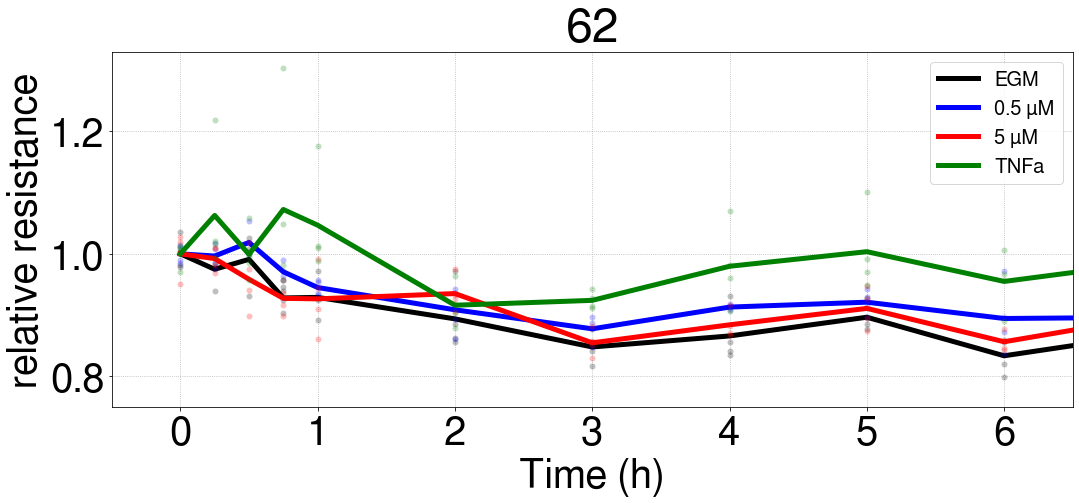

EGM
(40, 6)
0.0 [87.78 86.79 84.81 87.45]
0.25 [84.48 85.8  82.5  87.78]
0.5 [88.11 84.48 80.52 83.82]
0.75 [85.47 83.16 83.16 87.12]
1.0 [86.46 82.83 81.51 85.47]
2.0 [79.53 82.17 75.57 80.19]
3.0 [79.53 82.5  75.57 81.84]
4.0 [78.87 82.5  77.55 80.85]
6.0 [77.55 79.2  75.9  78.21]
24.0 [76.23 77.22 72.93 77.88]
i 86.7075
rt [[1.01236917 1.00095147 0.97811608 1.00856327]
 [0.97431018 0.98953378 0.95147479 1.01236917]
 [1.01617507 0.97431018 0.92863939 0.96669838]
 [0.98572788 0.95908658 0.95908658 1.00475737]
 [0.99714558 0.95528069 0.94005709 0.98572788]
 [0.91722169 0.94766889 0.8715509  0.92483349]
 [0.91722169 0.95147479 0.8715509  0.94386299]
 [0.9096099  0.95147479 0.8943863  0.93244529]
 [0.8943863  0.91341579 0.8753568  0.9019981 ]
 [0.8791627  0.8905804  0.84110371 0.8981922 ]]
rt av [1.         0.98192198 0.97145576 0.97716461 0.96955281 0.91531874
 0.92102759 0.92197907 0.89628925 0.87725975]
0.5 µM
(40, 6)
0.0 [94.71 84.15 91.74 92.4 ]
0.25 [82.83 89.76 86.46 90.42]
0.5 [8

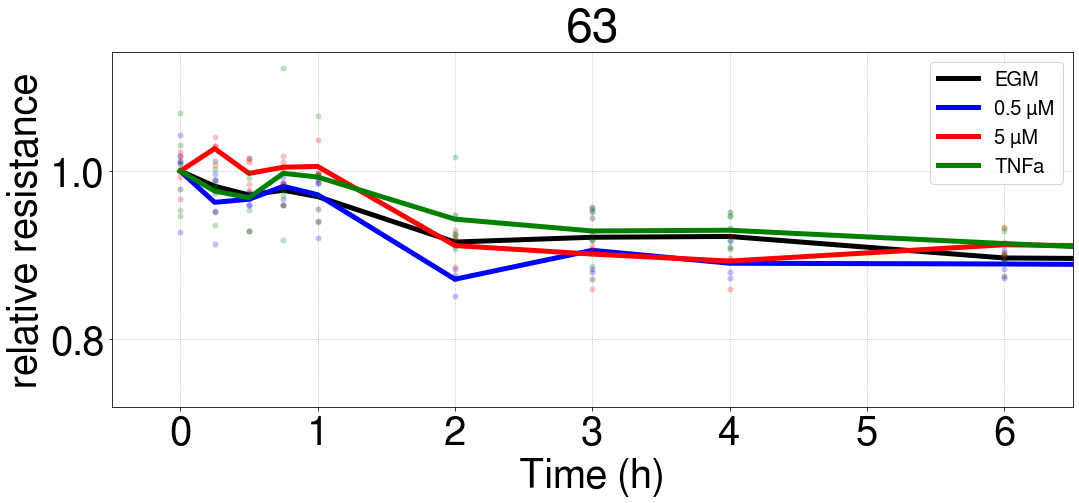

EGM
(30, 6)
0.0 [78.87 77.88 72.6 ]
0.25 [74.58 74.58 77.22]
0.5 [74.25 74.25 77.22]
0.75 [74.91 74.91 76.89]
1.0 [74.91 74.91 75.9 ]
2.0 [71.61 71.61 71.94]
3.0 [71.61 71.61 73.92]
4.0 [74.58 74.25 73.59]
6.0 [70.62 70.95 71.28]
24.0 [68.97 67.98 68.64]
i 76.45
rt [[1.03165468 1.01870504 0.94964029]
 [0.97553957 0.97553957 1.01007194]
 [0.97122302 0.97122302 1.01007194]
 [0.97985612 0.97985612 1.0057554 ]
 [0.97985612 0.97985612 0.99280576]
 [0.93669065 0.93669065 0.94100719]
 [0.93669065 0.93669065 0.96690647]
 [0.97553957 0.97122302 0.96258993]
 [0.92374101 0.92805755 0.9323741 ]
 [0.90215827 0.88920863 0.89784173]]
rt av [1.         0.98705036 0.98417266 0.98848921 0.98417266 0.9381295
 0.94676259 0.96978417 0.92805755 0.89640288]
0.5 µM
(40, 6)
0.0 [78.87 76.56 78.54 80.19]
0.25 [74.91 73.92 74.91 74.58]
0.5 [75.9  74.25 75.9  74.91]
0.75 [73.92 74.58 75.24 73.59]
1.0 [72.93 73.92 74.91 72.93]
2.0 [72.27 73.92 72.6  70.62]
3.0 [73.26 71.61 74.91 72.27]
4.0 [70.95 70.95 73.92 73.26

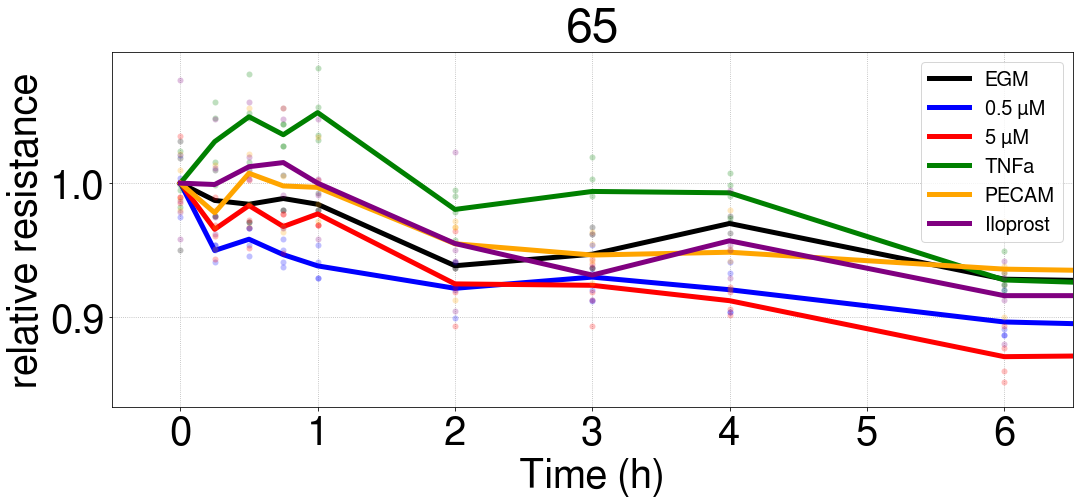

EGM
(16, 6)
0.0 [79.53 81.18 85.8  81.84]
1.0 [74.58 74.91 78.54 79.2 ]
4.0 [68.64 73.26 72.6  74.25]
24.0 [64.35 68.64 66.33 67.65]
i 82.0875
rt [[0.96884422 0.98894472 1.04522613 0.99698492]
 [0.90854271 0.91256281 0.95678392 0.96482412]
 [0.8361809  0.89246231 0.88442211 0.90452261]
 [0.7839196  0.8361809  0.8080402  0.8241206 ]]
rt av [1.         0.93567839 0.87939698 0.81306533]
0.5 µM
(16, 6)
0.0 [79.53 77.55 83.16 83.16]
1.0 [72.27 73.26 71.61 75.57]
4.0 [73.26 71.61 70.29 75.57]
24.0 [69.63 67.98 69.3  69.63]
i 80.85
rt [[0.98367347 0.95918367 1.02857143 1.02857143]
 [0.89387755 0.90612245 0.88571429 0.93469388]
 [0.90612245 0.88571429 0.86938776 0.93469388]
 [0.86122449 0.84081633 0.85714286 0.86122449]]
rt av [1.         0.90510204 0.89897959 0.85510204]
5 µM
(16, 6)
0.0 [81.51 78.21 78.54 79.2 ]
1.0 [70.29 69.63 70.95 68.97]
4.0 [70.95 70.29 71.94 71.94]
24.0 [70.62 69.63 69.63 68.97]
i 79.365
rt [[1.02702703 0.98544699 0.98960499 0.997921  ]
 [0.88565489 0.87733888 0.893970

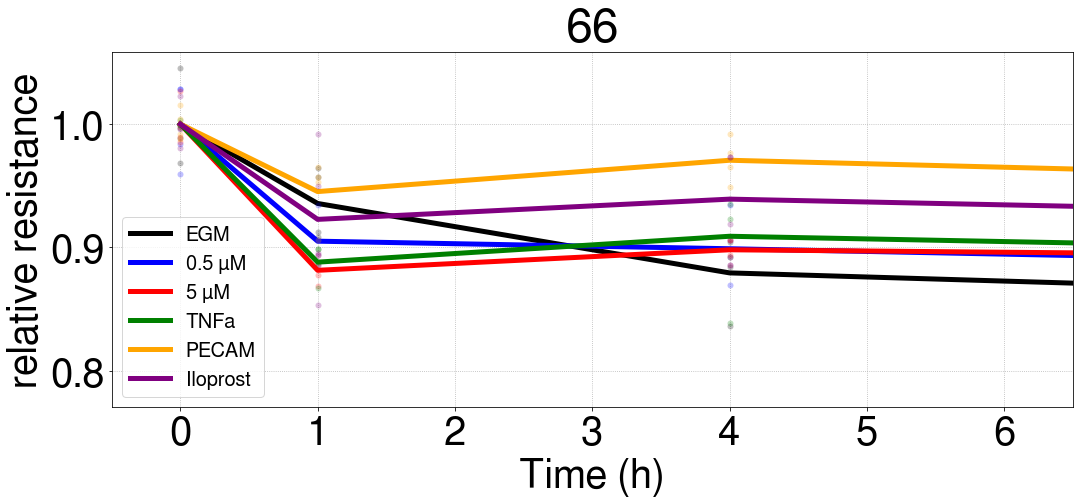

EGM
(16, 6)
0.0 [82.83 80.52 80.19 84.48]
1.0 [74.91 74.91 74.58 75.24]
4.0 [73.92 73.59 73.26 72.93]
24.0 [74.91 71.28 72.93 72.27]
i 82.005
rt [[1.01006036 0.98189135 0.9778672  1.03018109]
 [0.91348089 0.91348089 0.90945674 0.91750503]
 [0.90140845 0.89738431 0.89336016 0.88933602]
 [0.91348089 0.86921529 0.88933602 0.88128773]]
rt av [1.         0.91348089 0.89537223 0.88832998]
0.5 µM
(16, 6)
0.0 [83.16 83.49 84.48 81.51]
1.0 [74.91 74.58 76.89 74.58]
4.0 [74.25 74.91 74.91 71.61]
24.0 [73.26 73.26 71.61 71.28]
i 83.16
rt [[1.         1.00396825 1.01587302 0.98015873]
 [0.90079365 0.8968254  0.92460317 0.8968254 ]
 [0.89285714 0.90079365 0.90079365 0.86111111]
 [0.88095238 0.88095238 0.86111111 0.85714286]]
rt av [1.         0.9047619  0.88888889 0.87003968]
5 µM
(16, 6)
0.0 [86.46 84.48 84.81 80.85]
1.0 [71.61 71.28 71.61 75.57]
4.0 [70.95 72.6  69.63 69.96]
24.0 [71.94 70.62 70.29 71.61]
i 84.15
rt [[1.02745098 1.00392157 1.00784314 0.96078431]
 [0.85098039 0.84705882 0.85098039

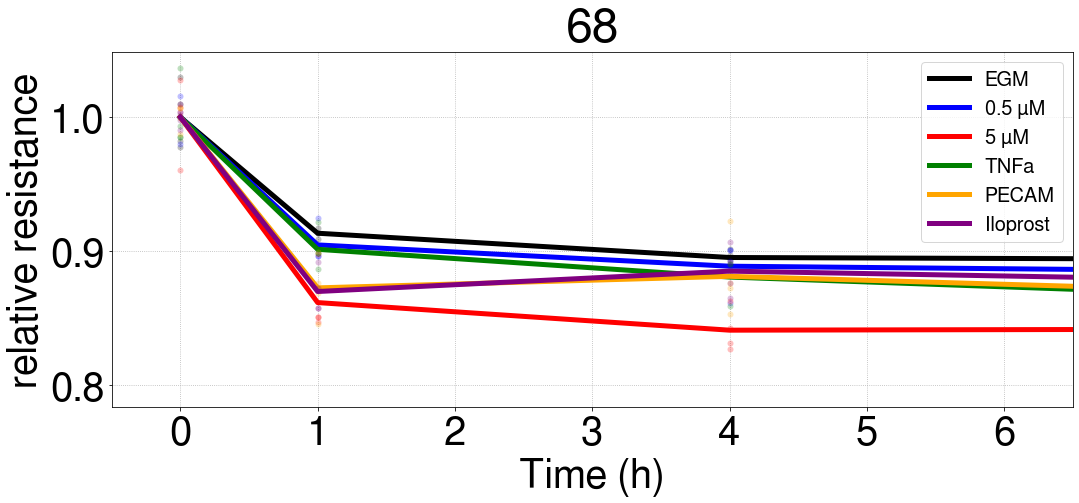

In [7]:
for e2a in experiments_to_analyze:
    all_relative_trajectories = []
    for i in range(len(treatment_labels)):

        tl = treatment_labels[i]
        tc = treatment_colors[i]
        
        print(tl)

        sub = df[(df['Experiment'] == e2a) & (df['Treatment'] == tl)]
        print(sub.shape)
        
        if sub.shape[0] > 0:
            trajectory = []; trajectory_time = []
            for timepoint in unique_timepoints:

                absolute_values = sub[sub['Timepoint (h)'] == timepoint]['TEER (Ohm*cm2)'].values

                if len(absolute_values) > 0:
                    trajectory.append(absolute_values)
                    trajectory_time.append(timepoint)
                    print(timepoint, absolute_values)

            trajectory = numpy.array(trajectory)
            average_initial = numpy.mean(trajectory[0,:])
            print('i', average_initial)
            relative_trajectory = trajectory/average_initial
            print('rt', relative_trajectory)
            print('rt av', numpy.mean(relative_trajectory, axis=1))
            
            matplotlib.pyplot.plot(trajectory_time, relative_trajectory, 'o', color=tc, alpha=1/4, mew=0)
            matplotlib.pyplot.plot(trajectory_time, numpy.mean(relative_trajectory, axis=1), '-', color=tc, lw=5, label=tl)

        # compare treatment trajectories to no treatment
        
        ### plot
        #matplotlib.pyplot.plot(trajectory_time, relative_trajectory, 'o', color=tc, alpha=1/4, mew=0)
        #matplotlib.pyplot.plot(trajectory_time, numpy.mean(relative_trajectory, axis=1), '-', color=tc, lw=2, label=tl)

    matplotlib.pyplot.xlim([-.5,6.5])
    matplotlib.pyplot.title(e2a)
    matplotlib.pyplot.legend(fontsize=20)
    matplotlib.pyplot.grid( linestyle=':')
    matplotlib.pyplot.xlabel('Time (h)')
    matplotlib.pyplot.ylabel('relative resistance')
    matplotlib.pyplot.tight_layout()
    matplotlib.pyplot.show()